### A Guide to Time Series Analysis in Python

Source: https://builtin.com/data-science/time-series-forecasting-python

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import mean_squared_error


C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read the data
df = pd.read_csv('AirPassengers.csv')

df.head()


Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [3]:
# Format the data into datetime object
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Convert month column to an index
df.index = df['Month']
del df['Month']


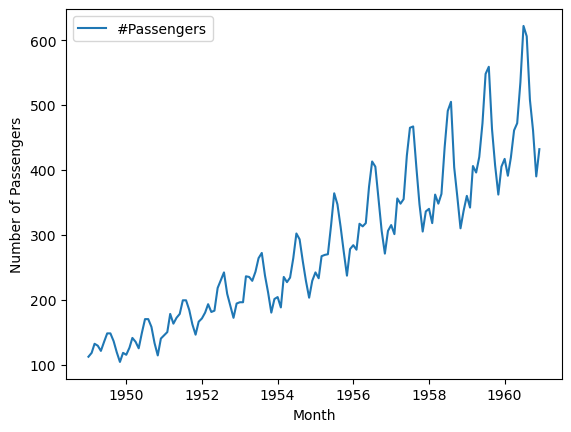

In [4]:
# Plot the data
sns.lineplot(df)
plt.ylabel('Number of Passengers')
plt.show()


#### Split the data

In [5]:
# Training data
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime('1960-08', format='%Y-%m')]

# Test data
del train['Date']
test = df[df['Date'] >= pd.to_datetime('1960-08', format='%Y-%m')]
del test['Date']


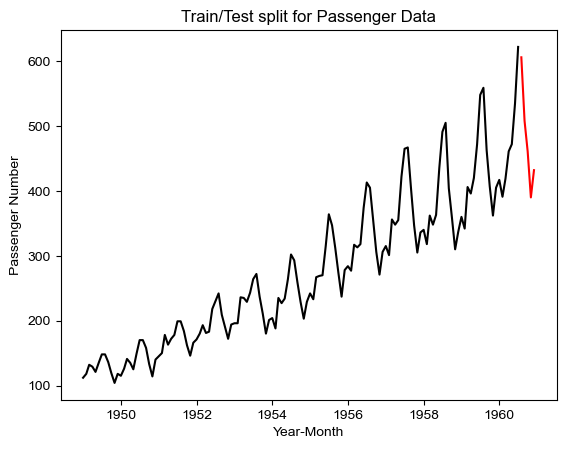

In [6]:
# Plot train and test data together
plt.plot(train, color = 'black')
plt.plot(test, color = 'red')
plt.title('Train/Test split for Passenger Data')
plt.ylabel('Passenger Number')
plt.xlabel('Year-Month')
sns.set()
plt.show()


#### ARMA

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Input
y = train['#Passengers']

# Model
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

# Predictions
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_ARMA = y_pred_df['Predictions'] 

# Performance
arma_rmse = np.sqrt(mean_squared_error(test['#Passengers'].values, y_pred_df['Predictions']))
print('RMSE:', arma_rmse)


RMSE: 172.6040655853198


C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


#### ARIMA

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Model
ARIMAmodel = ARIMA(y, order = (5, 3, 2))
ARIMAmodel = ARIMAmodel.fit()

# Predictions
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df['Predictions'] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_ARIMA = y_pred_df['Predictions'] 

# Performance
arma_rmse = np.sqrt(mean_squared_error(test['#Passengers'].values, y_pred_df['Predictions']))
print('RMSE:', arma_rmse)


C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE: 342.9603614249923


C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### SARIMA

In [9]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

# Predictions
y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df['Predictions'] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_SARIMA = y_pred_df['Predictions'] 

# Performance
arma_rmse = np.sqrt(mean_squared_error(test['#Passengers'].values, y_pred_df['Predictions']))
print('RMSE:', arma_rmse)


C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\statsmodel

RMSE: 56.784517531794634


#### Plot the results

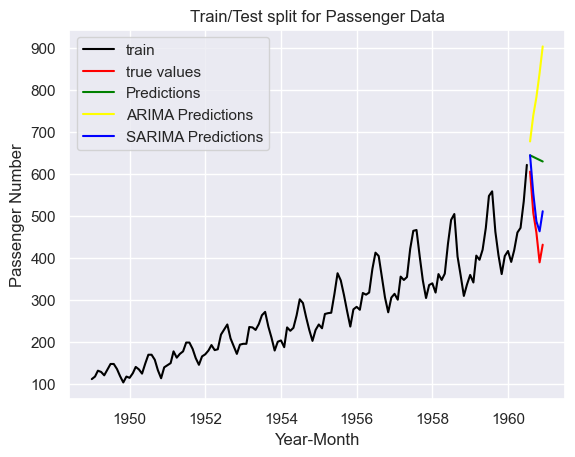

In [10]:
# Plot results
plt.plot(train, color = 'black', label='train')
plt.plot(test, color = 'red', label='true values')
plt.plot(y_pred_ARMA, color='green', label='Predictions')
plt.plot(y_pred_ARIMA, color='yellow', label='ARIMA Predictions')
plt.plot(y_pred_SARIMA, color='blue', label='SARIMA Predictions')
plt.legend()
plt.title('Train/Test split for Passenger Data')
plt.ylabel('Passenger Number')
plt.xlabel('Year-Month')
sns.set()
plt.show()


#### From the previous notebook

In [11]:
# Train the model
from pmdarima.arima import auto_arima

model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1352.593, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1340.702, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1336.259, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1352.415, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1329.986, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1335.098, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1336.923, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1329.407, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1335.407, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1339.796, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1325.560, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1336.3

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [12]:
# Forecast
forecast = model.predict(n_periods = len(test))
forecast = pd.DataFrame(forecast, index = test.index, columns=['Prediction'])


In [13]:
# Calculate RMSE
rms = sqrt(mean_squared_error(test,forecast))
print('RMSE:', rms)


RMSE: 61.36883664500577


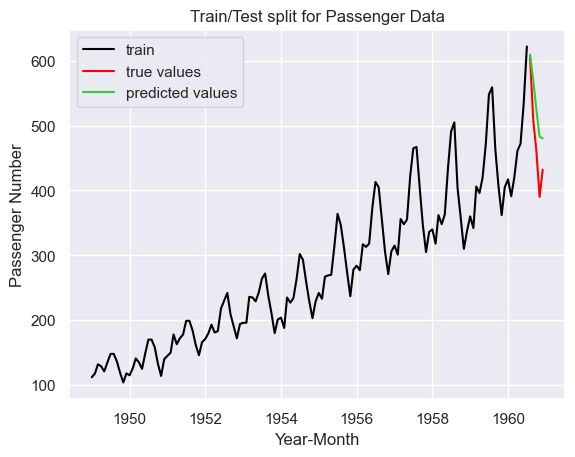

In [14]:
# Plot the results
plt.plot(train, color = 'black', label='train')
plt.plot(test, color = 'red', label='true values')
plt.plot(forecast, color= 'limegreen', label='predicted values')
plt.title('Train/Test split for Passenger Data')
plt.ylabel('Passenger Number')
plt.xlabel('Year-Month')
plt.legend()
sns.set()
plt.show()
